###### K Nearest Neighbor

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore' )

C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
data['Gender'] = le.fit_transform(data['Gender'])

In [8]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [9]:
x = data.iloc[::,:4]
y=data.iloc[::,4:]

In [10]:
x_tarin,x_test,y_train,y_test = train_test_split(x,y,random_state = 42)

In [11]:
sc = StandardScaler()
x_tarin = sc.fit_transform(x_tarin)
x_test = sc.transform(x_test)

In [12]:
knn =KNeighborsClassifier(metric='euclidean', n_neighbors = 5) #fitting the model with 5 nearest neighbors and metric = euclidean

In [13]:
knn.fit(x_tarin,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
y_pred = knn.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [16]:
accuracy_score(y_pred,y_test)

0.93

In [17]:
cm =confusion_matrix(y_pred,y_test)
cm

array([[60,  4],
       [ 3, 33]], dtype=int64)

#### finding the optimal k nearest neighbors using elbow curve method
    -in the range of 1 to 20 

In [18]:
miss_class = []
for k in range(1,21):
    knn = KNeighborsClassifier(metric='euclidean',n_neighbors=k)
    knn.fit(x_tarin,y_train)
    y_prd = knn.predict(x_test)
    cm = confusion_matrix(y_prd,y_test)
    miss = (cm.sum()-sum(np.diag(cm)))
    miss_class.append(miss)

In [19]:
len(miss_class)

20

In [20]:
from matplotlib import pyplot as plt

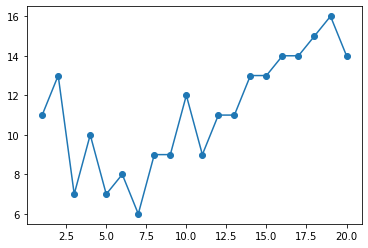

In [21]:
plt.plot(range(1,21),miss_class,marker = 'o')

In [61]:
knn_opt = KNeighborsClassifier( n_neighbors=7) # fitting the model with optimal k values

In [62]:
knn_opt.fit(x_tarin,y_train)
new_pred = knn_opt.predict(x_test)

In [63]:
accuracy_score(new_pred,y_test)

0.94